# Data Scraping

In this Session we will scrap  data from twitter using **Twitter API**with the help of Python's **Tweepy** Library

The twitter data API makes incredibley easy to query tweets by Location ,Keywords etc.

To get started ,You will need to do the following things

1.Set up twitter account if you don't have it already

2.Using Your Twitter account, you will need to apply for Developer Access and then create an Application that will generate the API credentials that you will use to access Twitter from Python

3.Import **Tweepy** Library

Once you have done these things , you are ready to begin querying Twitter's API to see what you can learn about tweets

### Access Twitter API in Python

Once you have your Twitter app set-up , you are ready to access tweets in Python . Begin by importing necessary Python Libraries 

In [2]:
import pandas as pd
import tweepy as tp
import os
import numpy as np
import nltk

To access the Twitter API, you will need 4 things from  your twitter App page. These keys are located in your Twitter app settings in the **Keys and Access Token** tab

In [3]:
consumer_key="your_key_here"
consumer_secret="your_key_here"
access_token="your_key_here"
access_secret="your_key_here"

Note:-For security I have not mentioned the keys here

In [ ]:
auth=tp.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api=tp.API(auth,wait_on_rate_limit=True)

### Let's Search Tweet for specific Keywords

#### Search Tweet for Keyword **Hyderabad**

In [ ]:
new_search="Hyderabad"+" -filter:retweets"## We are not considering Retweets
tweets=tp.Cursor(api.search,q=new_search,lang="en").items(700)
data=[[tweet.user.id,tweet.user.name,tweet.user.screen_name,tweet.text,tweet.user.location,tweet.place,"Hyderabad"] for tweet in tweets]
# tweet.user.id="Tweet user id"
# tweet.user.name="Actual Name of User"
# tweet.user.screen_name="User displaed name in Twitter"
# tweet.text="Tweet of user containing specific keyword"
# tweet.user.location="Home Location of User"
# tweet.palce="In order to get tweet location"

In [ ]:
## Creating a dataframe out of it
df1=pd.DataFrame(data,columns=["id","name","screen_name","text","home_location","tweet_location","mentioned_location"])

#### Similar Kind of thing is done for key word like "Chennai",and "Mumbai"

In [ ]:
new_search="Mumbai"+" -filter:retweets"
tweets=tp.Cursor(api.search,q=new_search,lang="en").items(700)
data=[[tweet.user.id,tweet.user.name,tweet.user.screen_name,tweet.text,tweet.user.location,tweet.place,"Mumbai"] for tweet in tweets]
df2=pd.DataFrame(data,columns=["id","name","screen_name","text","home_location","tweet_location","mentioned_location"])

In [ ]:
new_search="Chennai"+" -filter:retweets"
tweets=tp.Cursor(api.search,q=new_search,lang="en").items(700)
data=[[tweet.user.id,tweet.user.name,tweet.user.screen_name,tweet.text,tweet.user.location,tweet.place,"Chennai"] for tweet in tweets]
df3=pd.DataFrame(data,columns=["id","name","screen_name","text","home_location","tweet_location","mentioned_location"])

In [ ]:
## Let's Concatenate these 3 dataframes
df_whole=pd.concat([df1,df2,df3])

## Data Preprocessing

#### Let's perform Basic preprocessing on extracted data

In [ ]:
## Let's remove url from the end of each tweet
import re
def remove_url(x):
  return " ".join(re.sub("[^0-9A-Za-z \t]0 | (\w+:\/\/\S+)", "",x).split())

df_whole["text"]=df_whole["text"].apply(lambda x : remove_url(x))

In [ ]:
## Let's extract tweet location 
def extract_tweet_location(place):
    try:
      name=place.name
      return name
    except:
      return None
df_whole["tweet_location"]=df_whole["tweet_location"].apply(lambda x : extract_tweet_location(x))

In [ ]:
## Let's Shuffle the dataset
df_whole=df_whole.sample(frac=1).reset_index(drop=True)

In [ ]:
data=df_whole.copy()

In [ ]:
## Let's Remove the rows who doesn't have home location
data2=data[data["home_location"].notnull()]

In [ ]:
## Let's Fill the Nan value of tweet_location column by home_location 
data2["tweet_location"]=np.where(data2["tweet_location"].isnull(),data2["home_location"],data2["tweet_location"])

In [ ]:
## Let's remove the extra character from tweets like emojis ,punctuation
data2["text"]=data2["text"].apply(lambda x: re.sub("[^A-Za-z']",' ',x))

In [ ]:
## Let's remove the extra character from home location and tweet location
data2["home_location"]=data2["home_location"].apply(lambda x: re.sub("[^A-Za-z]",' ',x).strip())
data2["tweet_location"]=data2["tweet_location"].apply(lambda x: re.sub("[^A-Za-z]",' ',x).strip())

In [ ]:
## To remove Blank string By Nan Values
data2["home_location"].replace("",np.nan,inplace=True)

In [ ]:
## Let's Remove The Nan values and Create a new dataFrame
data3=data2[data2["home_location"].notnull()]

In [ ]:
## Let's Save it in a CSV file
data3.to_csv("Twitter_data.csv",index=0)

In [1]:
## Data Visulaization and Model building}

In [1]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns",10000)
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_colwidth",10000)

In [3]:
data=pd.read_csv("Twitter_data.csv")

In [4]:
data.head()

,id,name,screen_name,text,home_location,tweet_location,mentioned_location
0,38069711,TMJ-INH Jobs,tmj_inh_jobs,If jobs with titles like Senior Consultant Customer amp Marketing Customer Strategy Marketing BLR HYD GUR sou,Hyderabad,Hyderabad,Hyderabad
1,14935529,Citizen Matters,citizenmatters,Care about Mumbai Here s what you can do to make it better https t co uUBcsq uaJ,India,India,Mumbai
2,1305379023476764672,Screen2Hire,Screen2H,Looking for a SailPoint Developer with experience in SailPoint Identity IQ using Azure Devops and Agile Methodology,India,India,Hyderabad
3,215217705,Ashii,Ashii_Chennai,atti cus Omg how many times they ll use the same techniques to win those filthy minds There is a world beyond,India,India,Chennai
4,1321995824914554880,🕉️ Hindustāni 🕉️ 🛕 ♒,HSickulars,will join the Pakistan Forces and fight against India Asaduddin Owaisi Member of Parliament MIM Hyderabad,Bharat,Bharat,Hyderabad


In [5]:
data["home_location"].nunique()

409

In [6]:
data["tweet_location"].nunique()

421

In [7]:
data["home_location"].value_counts()[data["home_location"].value_counts()==1].index

Index(['Sialkot  Pakistan', 'Gaya  India', 'Oklahoma  USA',
       'Coimbatore  Jaipur  Jodhpur', 'NYC', 'Varanasi  India',
       'Trichy   Chennai', 'Idar Gujarat', 'Goregaon West  Mumbai',
       'existential crisis',
       ...
       'Gurugram', 'Chennai  From Kollam  Kerala', 'Earth',
       'Vidya Nagar  Adilabad', 'Hyderabad  India Kolkata', 'Surat  Gujarat',
       'India Mumbai Thane', 'Hyderabad Vijayawada', 'New York  USA',
       'Mira Road'],
      dtype='object', length=315)

In [8]:
np.sum([data["tweet_location"].value_counts()==1])

318

I can see there are lot of similar values in home_location and tweet_location like "Mumbai  India" and "Mumbai India" the only difference is space betwwen them

In [9]:
def format_loaction(x):
    words=x.split()
    words=[word.strip() for word in words]
    return " ".join(words)

In [10]:
data["home_location"]=data["home_location"].apply(lambda x: format_loaction(x))
data["tweet_location"]=data["tweet_location"].apply(lambda x: format_loaction(x))

In [11]:
data["tweet_location"].nunique()

414

In [12]:
data["home_location"].nunique()

402

In [13]:
data["home_location"].value_counts()

India                                                                 213
Mumbai India                                                          123
Hyderabad India                                                       104
Chennai India                                                          79
Hyderabad                                                              71
Chennai                                                                51
Mumbai                                                                 46
New Delhi India                                                        30
New Delhi                                                              29
Ranchi Jharkhand India                                                 22
Delhi                                                                  18
Tamil Nadu India                                                       17
Bengaluru                                                              13
Mumbai Maharashtra                    

In [ ]:
## As you know Chennai India is same as Chennai or chennai. Hense Replacing all by Chennai India

In [14]:
# Determining the locations which are starting from Chennai
chennai_val=[val for val in data['home_location'].unique() if (val.split(" ")[0]=="Chennai") | (val.split(" ")[0]=="chennai")|(val.split(" ")[0]=="CHENNAI")]

In [15]:
chennai_val

['Chennai',
 'Chennai India',
 'Chennai Tamil Nadu',
 'Chennai Tamil nadu India',
 'Chennai Tamil Nadu India',
 'Chennai Tamilnadu',
 'Chennai Tamilnadu India',
 'chennai',
 'CHENNAI PERIA MET',
 'CHENNAI',
 'chennai india',
 'Chennai From Kollam Kerala',
 'Chennai Auroville Kalvarayan',
 'Chennai india',
 'chennai INDIA']

In [16]:
# Determining the locations which are starting from Hyderabad
hyderabad_val=[val for val in data['home_location'].unique() if (val.split(" ")[0]=="Hyderabad") | (val.split(" ")[0]=="hyderabad")|(val.split(" ")[0]=="HYDERABAD")]

In [17]:
hyderabad_val

['Hyderabad',
 'Hyderabad India',
 'Hyderabad India thalapathy',
 'Hyderabad Chennai India',
 'Hyderabad Telangana',
 'Hyderabad Pakistan',
 'Hyderabad Medak',
 'Hyderabad Bengaluru',
 'Hyderabad Andhra Pradesh',
 'Hyderabad Telangana State',
 'Hyderabad mumbai India',
 'hyderabad',
 'HYDERABAD',
 'Hyderabad Telangana India',
 'Hyderabad India Kolkata',
 'Hyderabad India Calcutta',
 'Hyderabad Deccan',
 'Hyderabad india',
 'Hyderabad Vijayawada']

In [18]:
# Determining the locations which are starting from Mumbai
mumbai_val=[val for val in data['home_location'].unique() if (val.split(" ")[0]=="Mumbai") | (val.split(" ")[0]=="mumbai")|(val.split(" ")[0]=="MUMBAI")]

In [19]:
mumbai_val

['Mumbai Maharashtra',
 'Mumbai India',
 'Mumbai',
 'Mumbai Ahmedabad India',
 'mumbai',
 'Mumbai Maharashtra India',
 'Mumbai Thane',
 'Mumbai Maharashtra BHARAT',
 'Mumbai Delhi NCR',
 'Mumbai Hyderabad']

In [20]:
data["home_location"].replace(mumbai_val,"Mumbai India",inplace=True)
data["home_location"].replace(hyderabad_val,"Hyderabad India",inplace=True)
data["home_location"].replace(chennai_val,"Chennai India",inplace=True)

In [21]:
data["tweet_location"].replace(mumbai_val,"Mumbai India",inplace=True)
data["tweet_location"].replace(hyderabad_val,"Hyderabad India",inplace=True)
data["tweet_location"].replace(chennai_val,"Chennai India",inplace=True)

In [22]:
data["home_location"].value_counts()

India                                                                 213
Hyderabad India                                                       207
Mumbai India                                                          197
Chennai India                                                         161
New Delhi India                                                        30
New Delhi                                                              29
Ranchi Jharkhand India                                                 22
Delhi                                                                  18
Tamil Nadu India                                                       17
Bengaluru                                                              13
Bengaluru India                                                        11
Bangalore                                                               9
INDIA                                                                   8
Kolkata India                         

In [23]:
data["home_location"].nunique()

361

In [24]:
data["tweet_location"].nunique()

376

In [25]:
df=data.copy()

In [26]:
data["mentioned_location"].replace({"Hyderabad":1,"Mumbai":2,"Chennai":3},inplace=True)

In [27]:
sample=data["text"]+" "+data["home_location"]+" "+data["tweet_location"]

In [28]:
from nltk.corpus import stopwords

### Cleaning Stopwords from text

In [29]:
sentences=[]
for sen in sample:
    sen=sen.split()
    sen=[word for word in sen if word not in set(stopwords.words("english"))]
    sen=" ".join(sen)
    sentences.append(sen)

In [30]:
## Importing Libraries
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# Model Building

### Applying Bag of Words Techniques

In [32]:
vectorizer=CountVectorizer(max_features=2000)

In [33]:
X=vectorizer.fit_transform(sample).toarray()

In [34]:
X.shape

(1404, 2000)

In [35]:
y=data["mentioned_location"]

In [36]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.25,random_state=100)

In [38]:
from sklearn.metrics import accuracy_score

In [40]:
# Applying GaussianNB model 
gauss_model=GaussianNB()
gauss_model.fit(train_X,train_y)
pred=gauss_model.predict(test_X)
accuracy_score(test_y,pred)

0.5897435897435898

In [42]:
# Applying MultinomialNB model
multi_gauss_model=MultinomialNB()
multi_gauss_model.fit(train_X,train_y)
pred=multi_gauss_model.predict(test_X)
accuracy_score(test_y,pred)

0.8632478632478633

In [44]:
# Applying SVM model
svc=SVC()
svc.fit(train_X,train_y)
pred=svc.predict(test_X)
accuracy_score(test_y,pred)

0.886039886039886

In [49]:
# Applying Decision Tree model 
dt=DecisionTreeClassifier()
dt.fit(train_X,train_y)
pred=dt.predict(test_X)
accuracy_score(test_y,pred)

0.8717948717948718

Text(0, 0.5, 'Accuracies')

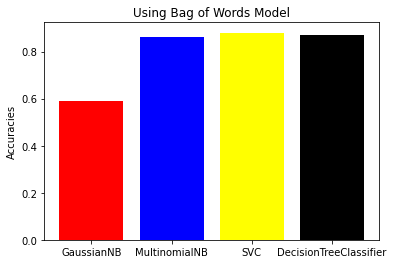

In [57]:
models=["GaussianNB","MultinomialNB","SVC","DecisionTreeClassifier"]
scores=[0.589,0.863,0.88,0.87]
plt.bar(x=models,height=scores,color=["red","blue","yellow","black"])
plt.title("Using Bag of Words Model")
plt.ylabel("Accuracies")

In [ ]:
## Our Bag of words model doesn't give semantic meaning to word . Hence we can use TF-IDF method

### Applying TF-IDF(Term frequency and Inverse document frequency) Techniques which gives semantic meaning to words

In [58]:
tf_vectorizer=TfidfVectorizer()

In [59]:
X=tf_vectorizer.fit_transform(sample).toarray()

In [60]:
X.shape

(1404, 6125)

In [61]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.25,random_state=1000)

In [62]:
# Applying GaussianNB model 
gauss_model=GaussianNB()
gauss_model.fit(train_X,train_y)
pred=gauss_model.predict(test_X)
print(accuracy_score(test_y,pred))

0.6210826210826211


In [63]:
# Applying MultinomialNB model 
multi_gauss_model=MultinomialNB()
multi_gauss_model.fit(train_X,train_y)
pred=multi_gauss_model.predict(test_X)
accuracy_score(test_y,pred)

0.8319088319088319

In [64]:
# Applying SVM model 
svc=SVC()
svc.fit(train_X,train_y)
pred=svc.predict(test_X)
accuracy_score(test_y,pred)

0.8803418803418803

In [66]:
# Applying Decision Tree model 
dt=DecisionTreeClassifier()
dt.fit(train_X,train_y)
pred=dt.predict(test_X)
accuracy_score(test_y,pred)

0.9002849002849003

In [68]:
## Plotting models performances

Text(0, 0.5, 'Accuracies')

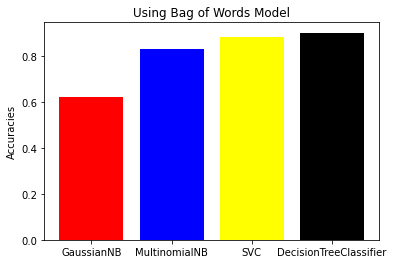

In [67]:
models=["GaussianNB","MultinomialNB","SVC","DecisionTreeClassifier"]
scores=[0.62,0.83,0.88,0.90]
plt.bar(x=models,height=scores,color=["red","blue","yellow","black"])
plt.title("Using Bag of Words Model")
plt.ylabel("Accuracies")

<--------------------------------------------- **Thank you**------------------------------------------->`